<a href="https://colab.research.google.com/github/anapitalai/gee/blob/main/carto_ee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install cartopy scipy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 55.0 MB/s eta 0:00:00


In [3]:
!pip install python-dotenv


In [6]:
#%matplotlib inline
import ee
import os
import geemap
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# import the cartoee functionality from geemap
from geemap import cartoee
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [14]:
#from google.colab import drive
#drive.mount('/content/envfiles')

# Path to your .env file in Google Drive
dotenv_path = '/content/drive/MyDrive/env/.env'
load_dotenv(dotenv_path=dotenv_path)

# Access the environment variables
project_name = os.getenv("project_name")

ee.Authenticate()
ee.Initialize(project=project_name)

In [ ]:
Map = geemap.Map()

image = (
    ee.ImageCollection("MODIS/MCD43A4_006_NDVI")
    .filter(ee.Filter.date("2022-04-01", "2024-01-01"))  ##("2018-04-01", "2018-05-01")
    .select("NDVI")
    .first()
)

vis_params = {
    "min": 0.0,
    "max": 1.0,
    "palette": [
        "FFFFFF",
        "CE7E45",
        "DF923D",
        "F1B555",
        "FCD163",
        "99B718",
        "74A901",
        "66A000",
        "529400",
        "3E8601",
        "207401",
        "056201",
        "004C00",
        "023B01",
        "012E01",
        "011D01",
        "011301",
    ],
}
Map.set_center(146.677, -6.677, 8)
Map.addLayer(image, vis_params, "MODIS NDVI")
countries = ee.FeatureCollection("users/giswqs/public/countries")
style = {"color": "00000088", "width": 1, "fillColor": "00000000"}
Map.addLayer(countries.style(**style), {}, "Countries")
ndvi = image.visualize(**vis_params)
blend = ndvi.blend(countries.style(**style))
Map.addLayer(blend, {}, "Blend")
Map

Map(center=[-6.677, 146.677], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

In [ ]:
# specify region to focus on
bbox = [180, -88, -180, 88]
zoom_region = [140.0, -12.0, 156.0, -1.0]
#zoom_region = [140.0, -12.0, 160.0, 0]


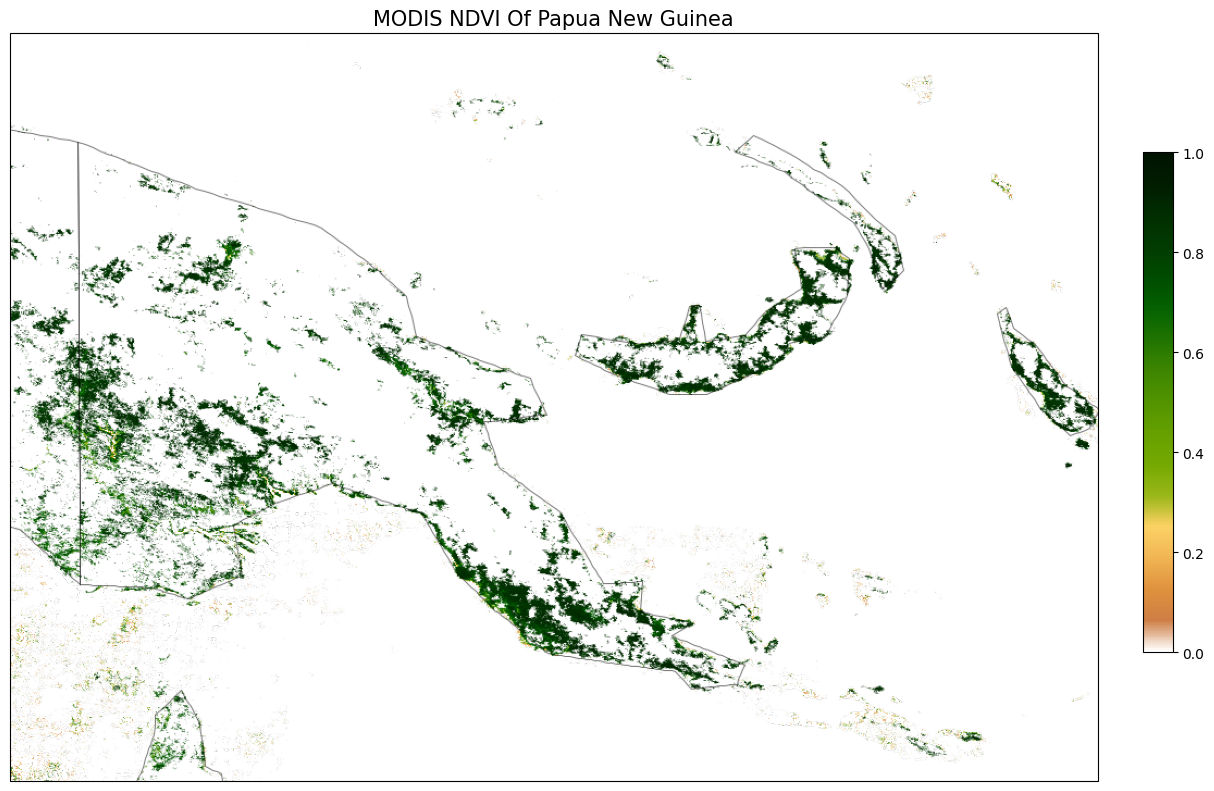

In [ ]:
fig = plt.figure(figsize=(15, 10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(blend, region=zoom_region)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc="right")

ax.set_title(label="MODIS NDVI Of Papua New Guinea", fontsize=15)

# ax.coastlines()
plt.show()

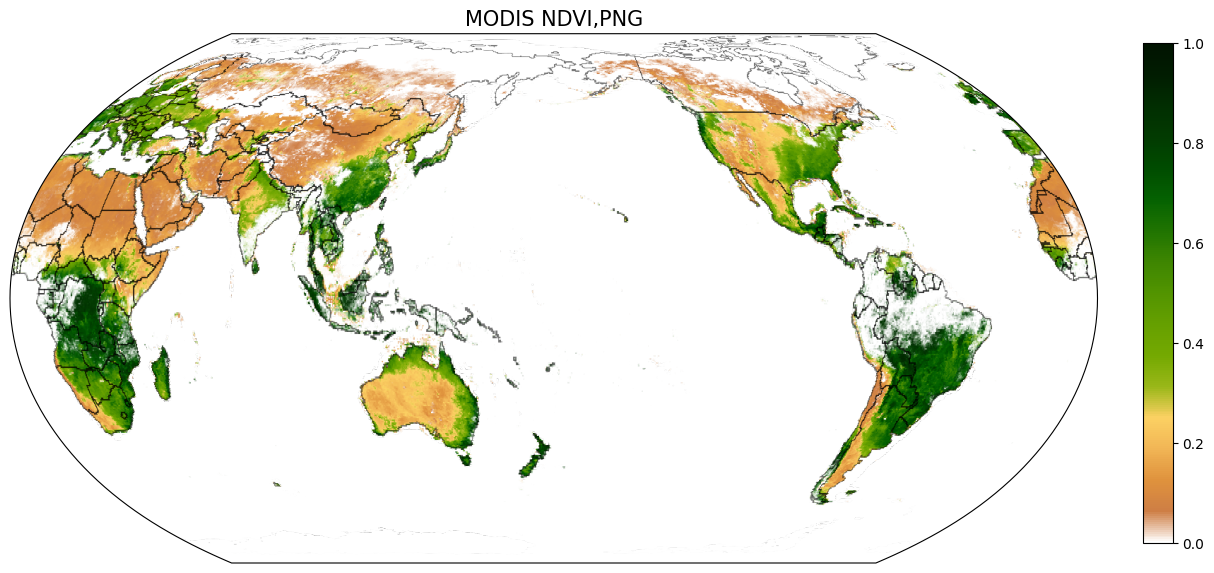

In [ ]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.EqualEarth(central_longitude=-180)

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(blend, region=bbox, proj=projection,zoom_level=8)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc="right")

ax.set_title(label="MODIS NDVI,PNG", fontsize=15)

# ax.coastlines()
plt.show()

In [ ]:
dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate(
    '2025-01-01', '2025-02-01'
).filterMetadata('CLOUD_COVER', 'less_than', 50)

#image=dataset.first().projection().getInfo()
#dataset=dataset.median().reproject(crs="EPSG:4326", scale=30)

# Applies scaling factors.
def apply_scale_factors(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  )

dataset = dataset.map(apply_scale_factors)
zoom_region = [140.0, -12.0, 156.0, -1.0]
#composite = dataset.median().reproject(crs='EPSG:3857', scale=30)

vis = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
    'min': 0.0,
    'max': 0.3,
}

# countries = ee.FeatureCollection("users/giswqs/public/countries")
# style = {"color": "00000088", "width": 1, "fillColor": "00000000"}

# ndvi = image.visualize(**vis_params)
# blend = ndvi.blend(countries.style(**style))
# Map.addLayer(blend, {}, "Blend")


Map = geemap.Map()
#Map.addLayer(countries.style(**style), {}, "Countries")
Map.set_center(146.677, -6.677, 8)
# Map.addLayer(countries, style,'COUNTRY')

Map.addLayer(dataset, vis,'True Color (432)')
Map


Map(center=[-6.677, 146.677], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

Help on function get_map in module geemap.cartoee:

get_map(ee_object, proj=None, basemap=None, zoom_level=2, **kwargs)
    Wrapper function to create a new cartopy plot with project and adds Earth
    Engine image results
    Args:
        ee_object (ee.Image | ee.FeatureCollection): Earth Engine image result to plot
        proj (cartopy.crs, optional): Cartopy projection that determines the projection of the resulting plot. By default uses an equirectangular projection, PlateCarree
        basemap (str, optional): Basemap to use. It can be one of ["ROADMAP", "SATELLITE", "TERRAIN", "HYBRID"] or cartopy.io.img_tiles, such as cimgt.StamenTerrain(). Defaults to None. See https://scitools.org.uk/cartopy/docs/v0.19/cartopy/io/img_tiles.html
        zoom_level (int, optional): Zoom level of the basemap. Defaults to 2.
        **kwargs: remaining keyword arguments are passed to addLayer()
    Returns:
        ax (cartopy.mpl.geoaxes.GeoAxesSubplot): cartopy GeoAxesSubplot object with Earth

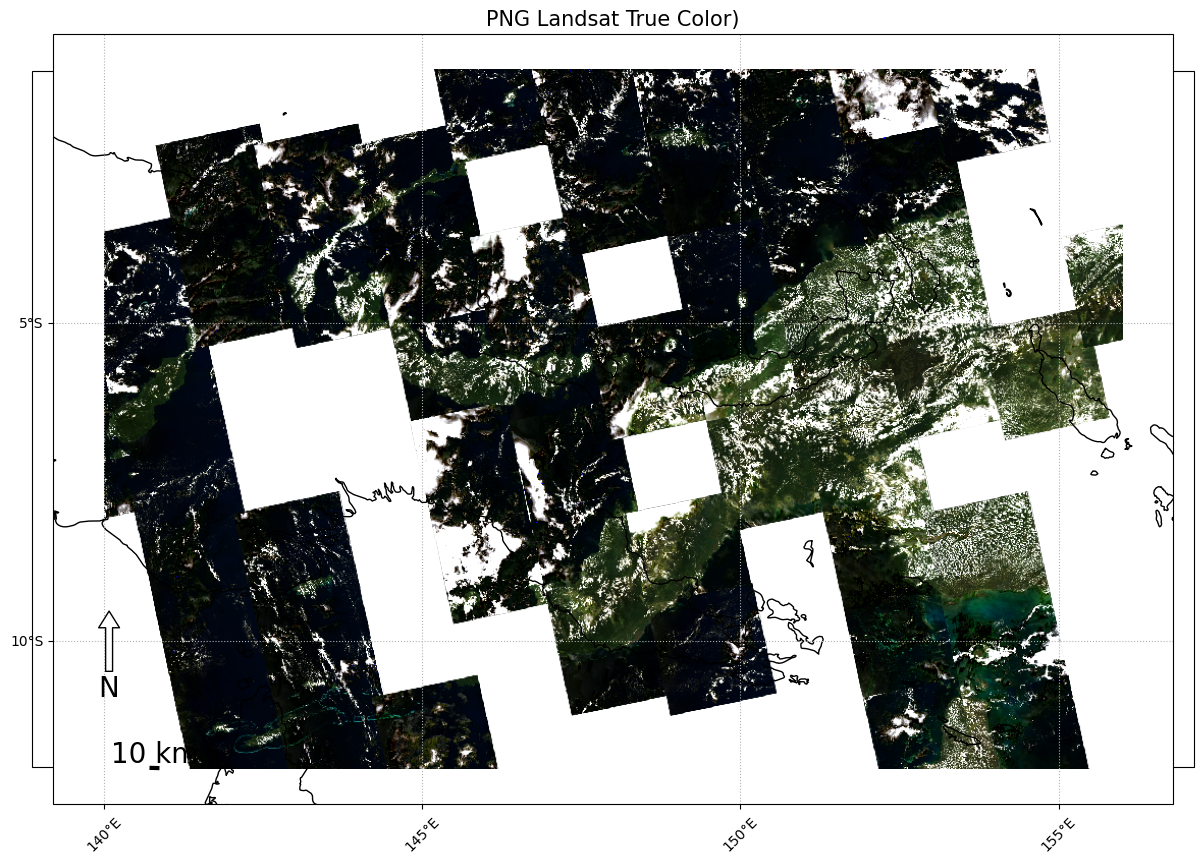

In [ ]:

#zoom_region=[E,S,W,N]
zoom_region = [140.0, -12.0, 156.0, -1.0]
#zoom_region = [180, -60, -180, 85]
#zoom_region = [180, -60, -180, 85]

#projection = ccrs.Mollweide(central_longitude=-180)
projection = ccrs.PlateCarree()
#projection=ccrs.Mercator()
#crs="EPSG:32620"
#projection = ccrs.EqualEarth(central_longitude=-180)


fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(projection=projection)
ax.set_extent(zoom_region,crs=projection)

# use cartoee to get a map
ax = cartoee.get_map(dataset, vis_params=vis,region=zoom_region)
help(cartoee.get_map)

# pad the view for some visual appeal
cartoee.pad_view(ax)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=5, xtick_rotation=45, linestyle=":")

# add the coastline
ax.coastlines(color="black")
# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.05, 0.25), text_color="black", arrow_color="white", fontsize=20
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=10, xy=(0.1, 0.05), fontsize=20, color="black", unit="km"
)

ax.set_title(label="PNG Landsat True Color)", fontsize=15)

# Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig("rgb.pdf")
# plt.savefig("rgb.jpg", dpi=300)
plt.show()

